# Table of Contents

1. [Problem Statement](#scrollTo=8lmfXuQgNXcO)
2. [Data Cleaning](#scrollTo=aG537s4zvPz4)
3. [Exploratory Data Analysis](#scrollTo=MG5ULrvXP34a)
4. [Model selection](#scrollTo=ebChP0fxkcdr)
5. [Handling Data Imbalance](#scrollTo=2X8dY5syphV5)

## Problem Statement
Objective of the use case and description
## Data Cleaning
Removing missing values and cleaning data

## Exploratory Data Analysis
Analyzing data and performing Univariate Analysis, Multivariate Analysis.

## Prediction of income with below models.
Training model and testing there performance

## Handling Data Imbalance
Ensure dataset balance and detect outliers. Then, implement feature engineering before training the model. Apply cross-validation and hyperparameter tuning to select the optimal model with the best hyperparameter values.

# Problem Statement:


For this dataset, we will have to predict the income of an employee based on their different
attributes. The prediction task is to determine whether a person makes over $50K a year or not

i.e., there are only 2 categories ($50K, <=$50K per year) on which each employee will be classified

> Mounting Google Drive for loading dataset

In [3]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
csv_file_path  =  "/content/drive/MyDrive/income_evaluation.csv"

In [5]:
# import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


from sklearn.svm import SVC, LinearSVC

sns.set(style='white', context='notebook', palette='deep')

In [6]:
df = pd.read_csv(csv_file_path, encoding='utf-8')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
for i in df.columns:
  print(i)

print(f"we have total columns of {len(df.columns)}")

age
 workclass
 fnlwgt
 education
 education-num
 marital-status
 occupation
 relationship
 race
 sex
 capital-gain
 capital-loss
 hours-per-week
 native-country
 income
we have total columns of 15


Total have 14 columns of features, the last column: `income` is the classification label: `>50k, <=50k`, other features as below:

* `age`: numerical
* `workclass`: categorical
* `fnlwgt`: numerical
* `education`: categorical
* `education-num`: numerical
* `marital-status`: categorical
* `occupation`: categorical
* `relationship`: categorical
* `race`: categorical
* `sex`: categorical
* `capital-gain`: numerical
* `capital-loss`: numerical
* `hours-per-week`: numerical
* `native-country`: categorical

> 8 - Categorical features

> 6 - Numerical features

And one more things need to take note is the dataset is imbalanced, there are two classes values: `>50k` and `<=50k`.
* `>50k`: miniority class, around `25%`
* `<=50k`: majority class, around `75%`


# Data Cleaning


Column names have space in the front, need to rename them.



In [8]:
df.columns= ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [9]:
# a brief overview or summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From the summary above it can be seen that:

The DataFrame has 32561 rows and 15 columns
There is no null value or missing information in the dataset as all columns have 32561 entries
Data types include integers(int) and strings(object)
The DataFrame shows there are no null values but a closer look at the loaded dataset by viewing in excel shows columns with (?) values

In [10]:
# Let's check which columns have question mark (?) as values in the DataFrame

# First convert the ? entries to nan
df.replace(r'\?', np.NaN, regex=True, inplace=True)


# Check missing values
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

The above shows that the workclass column has 1836 ? values while occupation column and native-country column both have 1843 and 583 ? values respectively.

While our DataFrame shows that we have no null values, it is worthy of note that these particular columns have unknown values represented or filled with question mark(?)

Three attributes have missing values, let's take care of them one by one.



In [ ]:
df.occupation.value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [ ]:
df.occupation.fillna(' unknown',inplace=True)

In [ ]:
df.occupation.value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 unknown              1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

Replace missing values in `workclass` feature

In [ ]:
df.workclass.value_counts()


workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [ ]:
df.workclass.fillna(' Private',inplace=True)


In [ ]:
df.workclass.value_counts()


workclass
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

Replace missing values in `native_country` feature

In [ ]:
df.native_country.value_counts()


native_country
 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                

In [ ]:
df.native_country.fillna(' United-States',inplace=True)


In [ ]:
# Check missing again values
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# Exploratory Data Analysis

In [ ]:
# Print statistical characteristics of numerical variables in the dataset

df.describe().round(2)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,10.08,1077.65,87.30,40.44
std,13.64,105549.98,2.57,7385.29,402.96,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,237051.00,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


In [ ]:
# Check number of unique values or categories in each column
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       41
income                2
dtype: int64

Above are the number of distinct entries in each column. There are 73 unique values for age, 9 for workclass and so on.



Let’s plot some graphs to visualize the dataset and relationship between columns


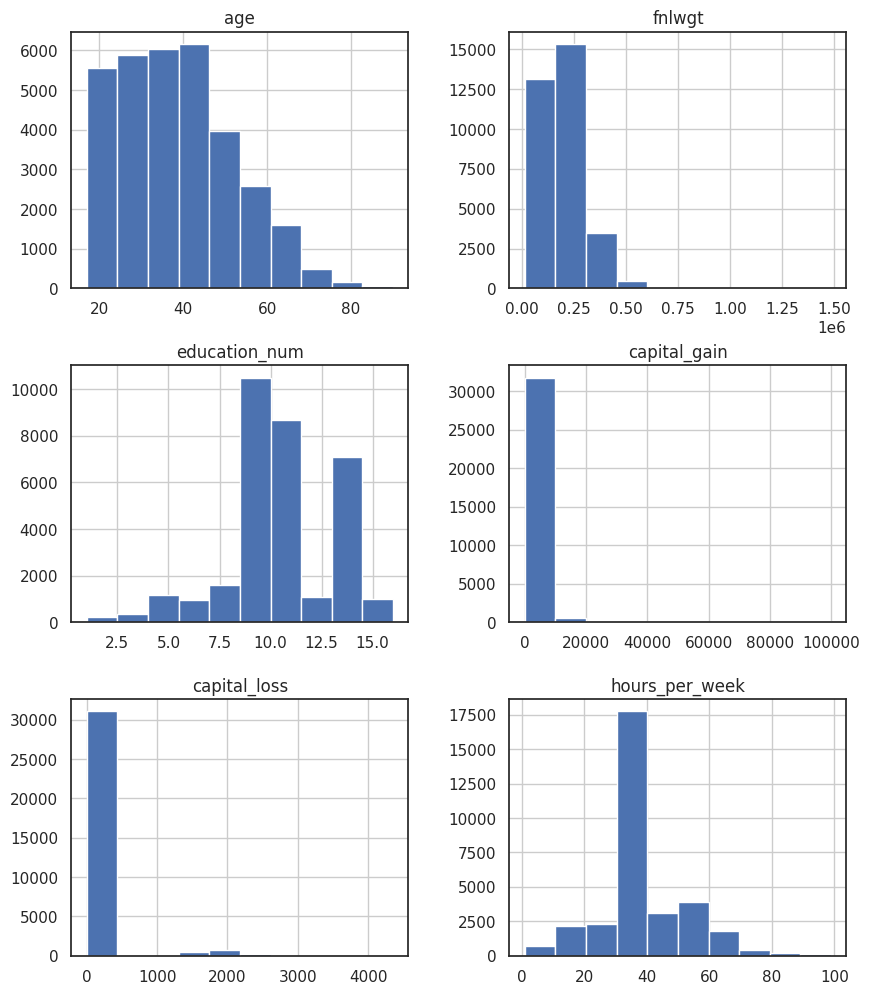

In [ ]:
# plot histogram of numerical columns using pandas
df.hist(bins=10, figsize=(10,12));


Above are Histogram plots of numerical columns in the dataset showing the distributions. we can infer from these plots that:

* Most of the people in the dataset are within the age range of `17 & 45` years of age.
* The final weight (fnlwgt) assigned to each record is majorly between 1,000,000 and 3,000,000.
* Most individuals completed between 8 to 12 years of education (educational_num).
* The profit earned from selling an asset at a price higher than its purchase cost (capital-gain) is mostly between 0–10000 USD.
* The losses from selling an asset for a price lower than the original purchase price (capital-loss) is mostly between 0–450 USD.
* Most people worked between 30–40 hours-per-week

In [ ]:
# Correlation between numerical columns
num_columns = df[["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week"]]
num_columns.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


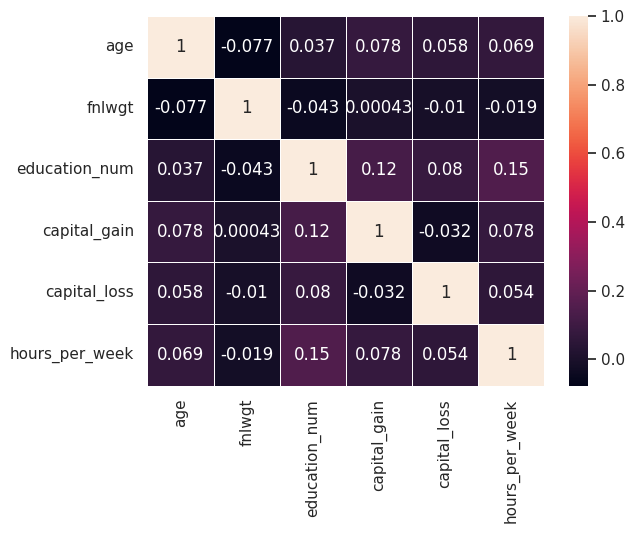

In [ ]:
# Plot correlation matrix heatmap using Seaborn
sns.heatmap(num_columns.corr(), annot=True, linewidth=0.5);

The correlation between the numerical columns is low and as such we do not have high collinearity between numerical columns

## Univariate analysis

### Lets visualize the count plot of unique values in each categorical column

### Age

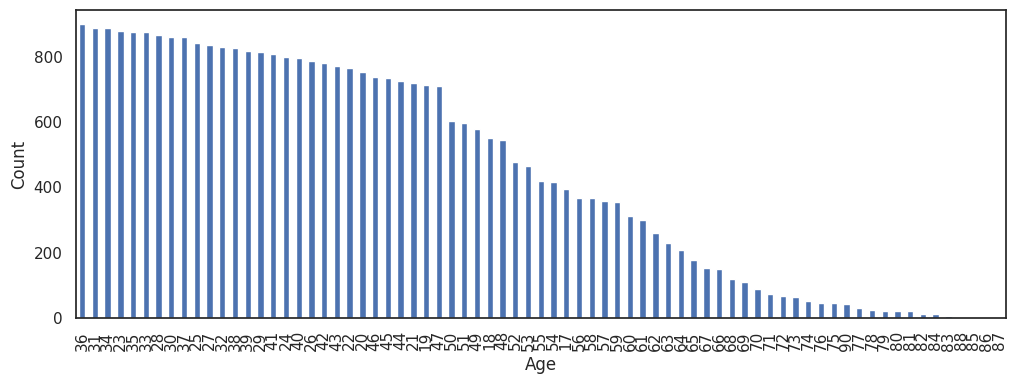

In [ ]:
df["age"].value_counts().plot.bar(figsize = (12, 4));
plt.xlabel("Age")
plt.ylabel("Count")
plt.show();

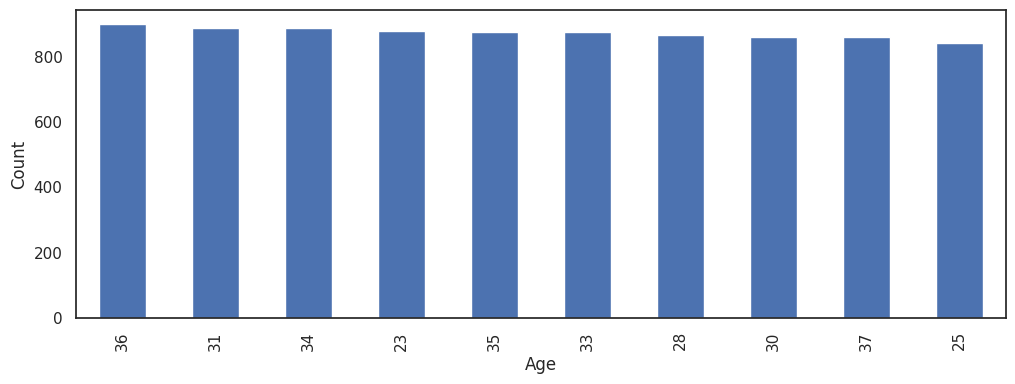

In [ ]:
# Top 10 most frequent age groups in the dataset
df["age"].value_counts().head(10).plot.bar(figsize = (12, 4));
plt.xlabel("Age")
plt.ylabel("Count")
plt.show();

### Workclass

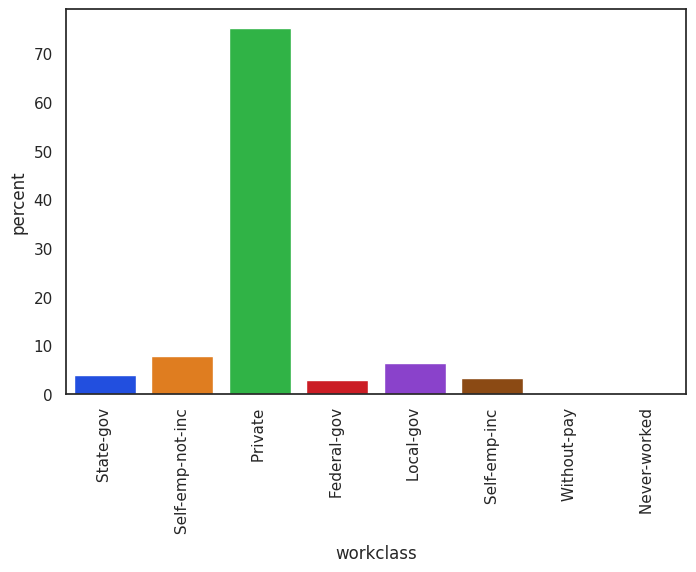

In [ ]:
# Seaborn has six variations of matplotlib’s palette, called deep, muted, pastel, bright, dark, and colorblind
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=df, x="workclass", stat="percent", hue="workclass", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

From above we can see that 70% of workclass fall under the private



### Education

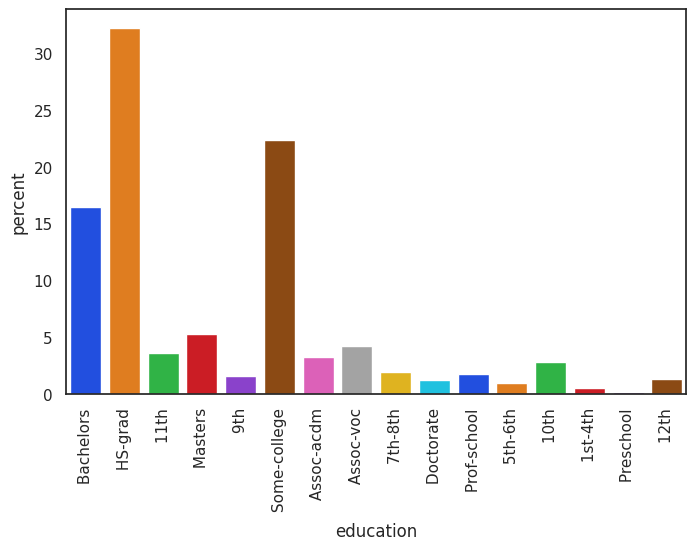

In [ ]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=df, x="education", stat="percent", hue="education", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

Majority of the workclass are High school grads, bachelors degree holders and college grads



### Marital-status

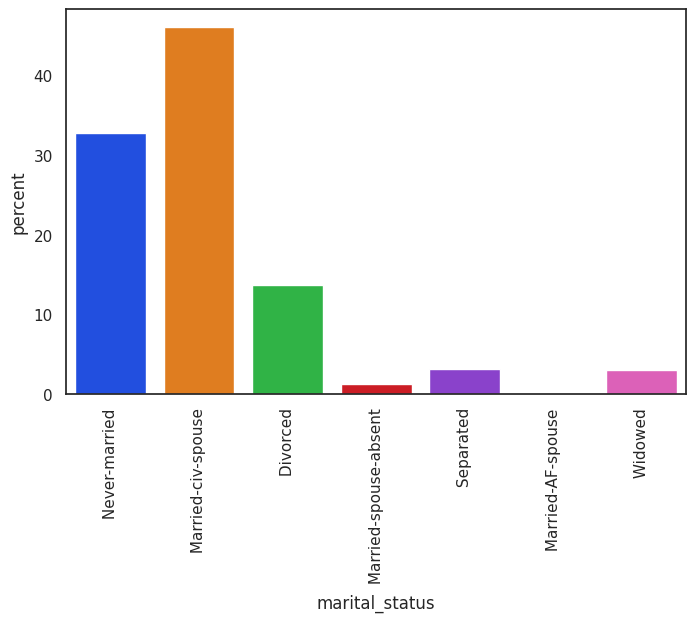

In [ ]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=df, x="marital_status", stat="percent", hue="marital_status", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

from above plot we can see `married-civ-spouse` and `never-married` having highest count comparing to rest





### Occupation

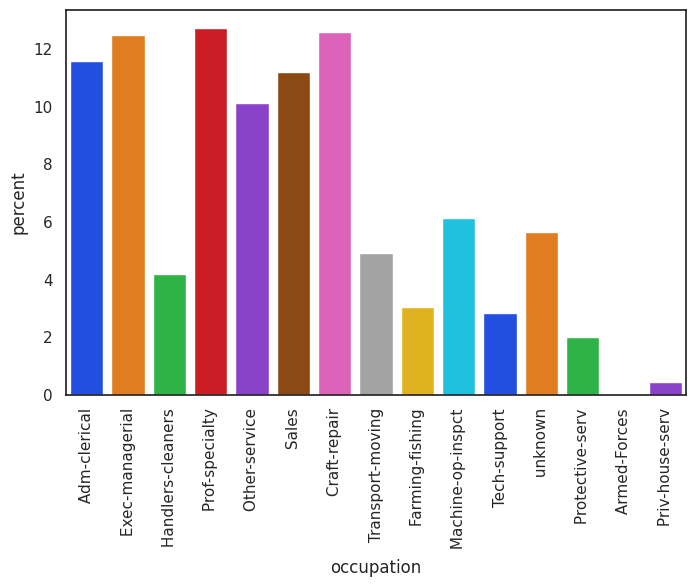

In [ ]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=df, x="occupation", stat="percent", hue="occupation", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

Majority of the adults work in the prof-specialty, craft-repair, adm-clerical, exec-managerial, sales and other-services occupation

### relationship

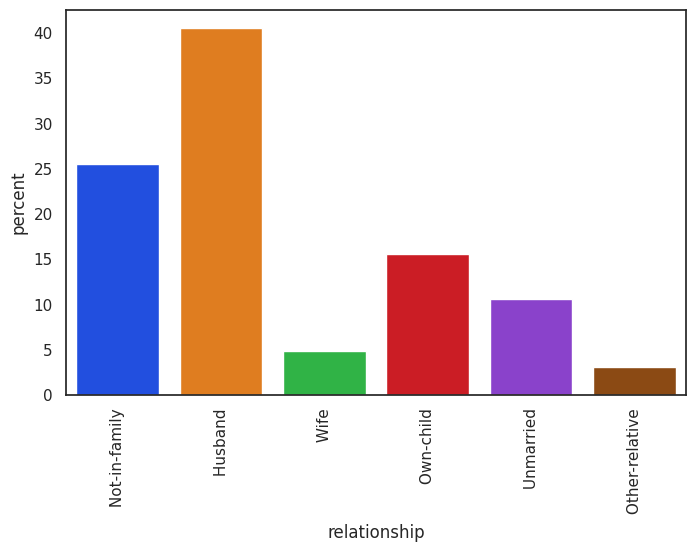

In [ ]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=df, x="relationship", stat="percent", hue="relationship", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

Majority are `husband` and `not in family` group from the above relationship

### Race

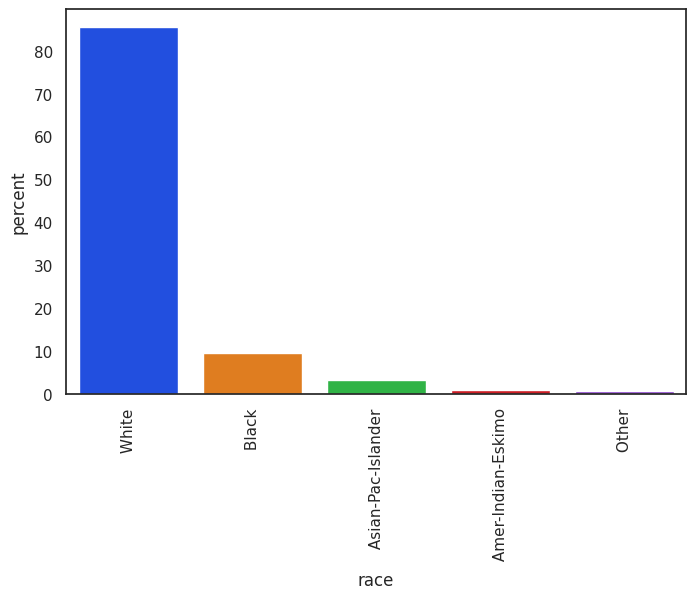

In [ ]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=df, x="race", stat="percent", hue="race", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

We can see that `white` are in majority compare to any other race

### Sex

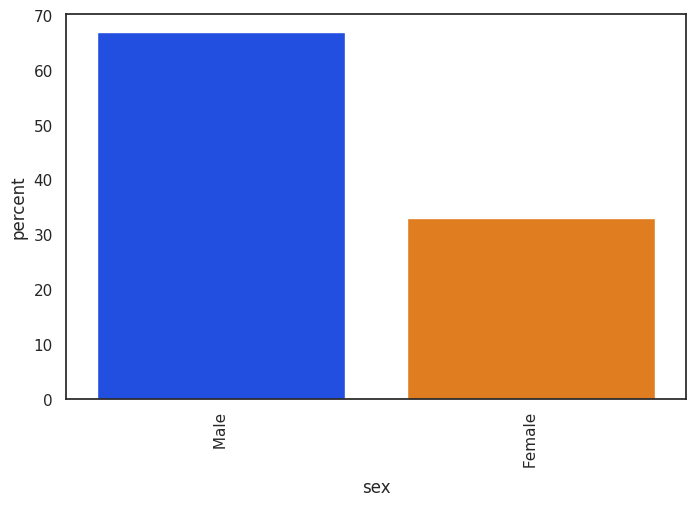

In [ ]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=df, x="sex", stat="percent", hue="sex", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

Percentage of `male` are more comparing to percentage of `female`

### native-country

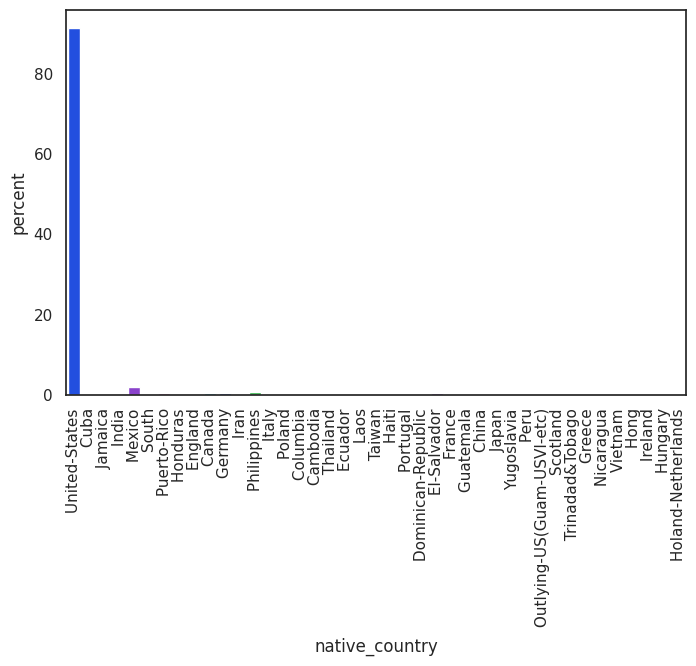

In [ ]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=df, x="native_country", stat="percent", hue="native_country", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

we can see high skewed in `united-states` as native country are large and other native country are very less compare to US

## Multivariate analysis

### Education and Workclass


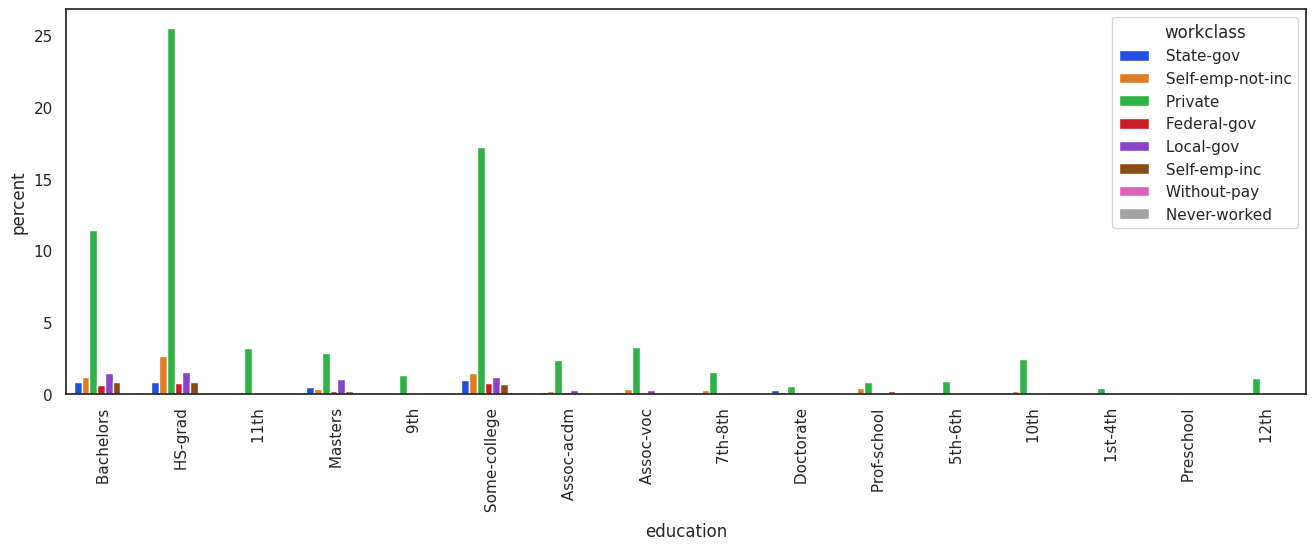

In [ ]:
fig, ax = plt.subplots(figsize = (16, 5))
sns.countplot(data=df, x="education", stat="percent", hue="workclass", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

It is evident from above that majority of the workclass from different education groups work in the private sector.



### Marital-status and Workclass


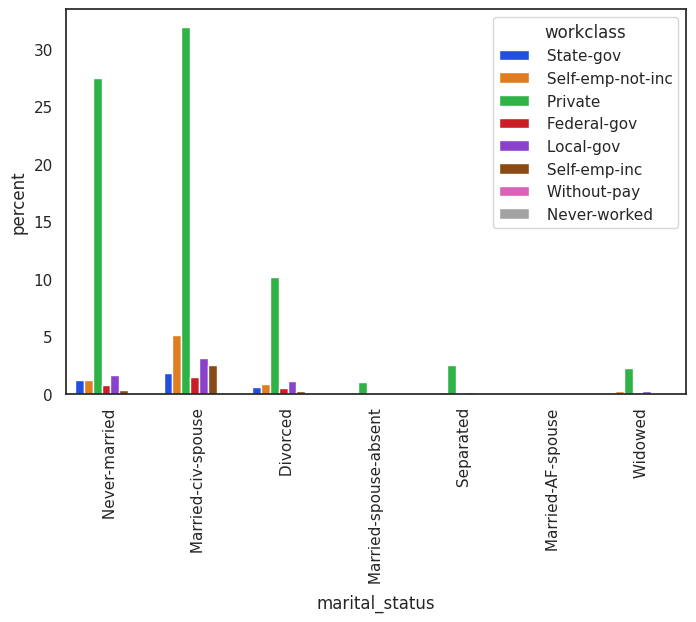

In [ ]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=df, x="marital_status", stat="percent", hue="workclass", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

Above is the distribution of workclass by marital-status. Majority of singles and married-civ-spouse work in the private sector



### Race and Income


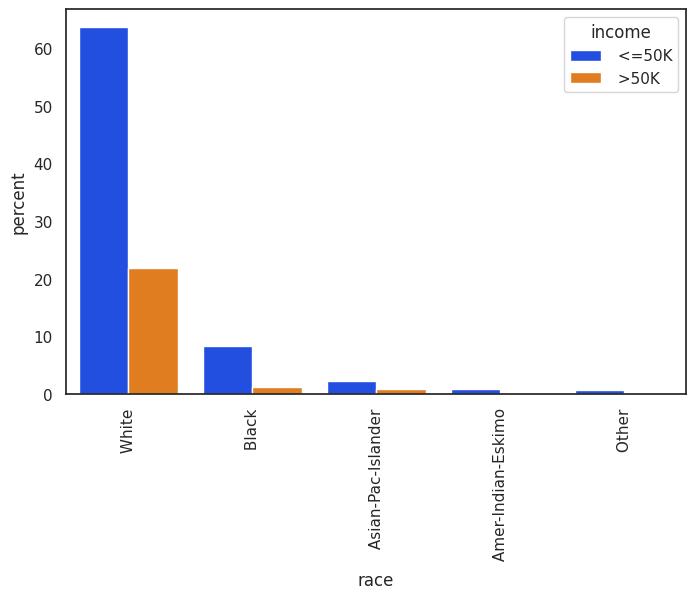

In [ ]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.countplot(data=df, x="race", stat="percent", hue="income", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

The above shows that the whites earn significantly more than other races in the dataset.



Let’s explore the relationship between ‘race’ and ‘education’ and also ‘occupation’ to find out why.

### Race and Occupation


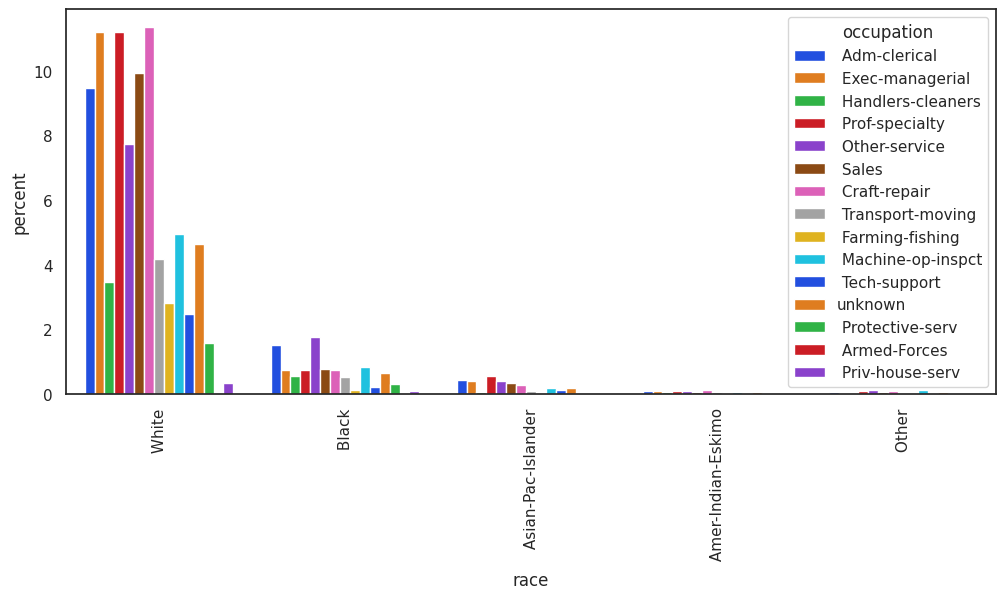

In [ ]:
fig, ax = plt.subplots(figsize = (12, 5))
sns.countplot(data=df, x="race", stat="percent", hue="occupation", palette="bright", ax=ax)
ax.tick_params(axis='x', labelrotation=90)

the bar for White workers shows that the largest percentage are employed in Administrative/Clerical occupations, followed by Professional/Specialty occupations and Sales occupations comparing to other race

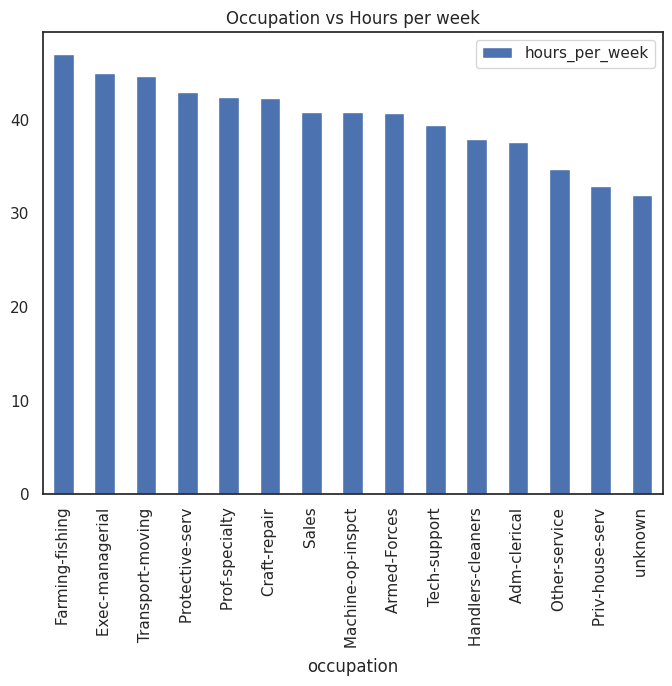

In [ ]:
df1 = pd.DataFrame(df.groupby(['occupation'])['hours_per_week'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Occupation vs Hours per week')
plt.show()

* Occupations such as farming-fishing, exec-managerial, transport-moving, professional specialty occupations, craft repairers, and machine operators, tend to have longer workweeks.

* while others, such as sales workers, handlers, cleaners, and helpers, tend to have shorter workweeks.

Numerical and categorical variables' relationships with target variable "income"



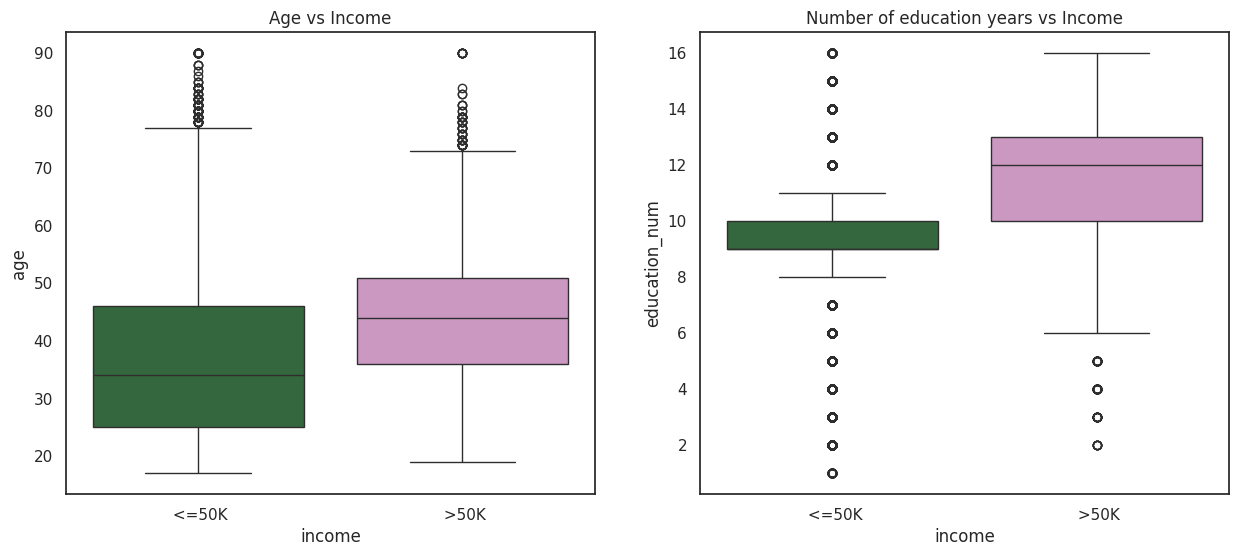

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Age vs Income')
sns.boxplot(x=df.income, y=df.age, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Number of education years vs Income')
sns.boxplot(x=df.income, y=df.education_num, palette=("cubehelix"))

plt.show()


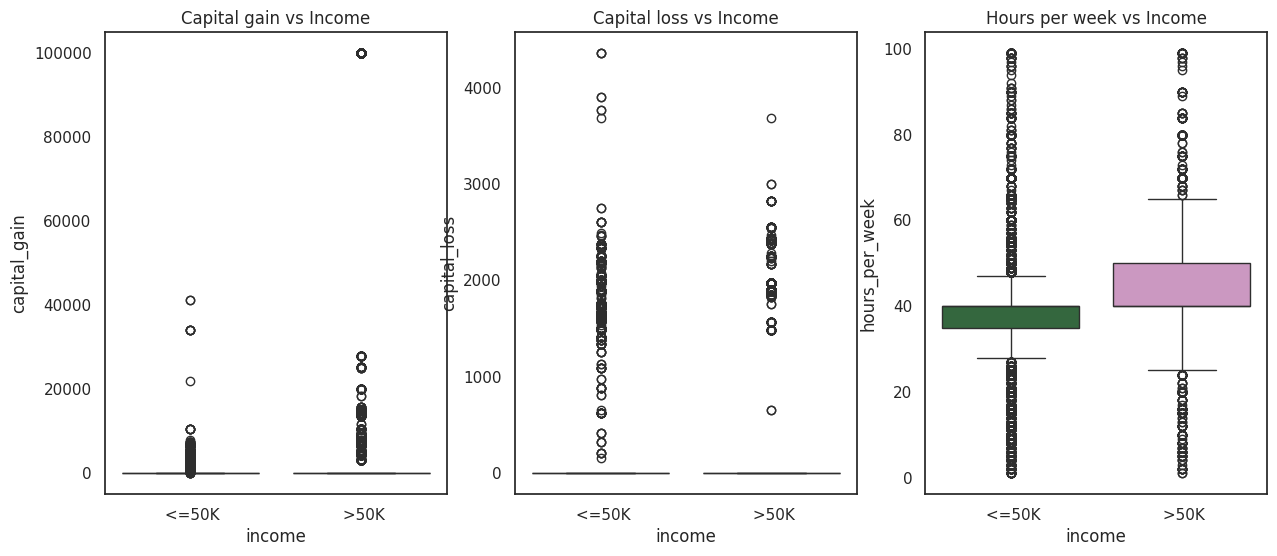

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.title('Capital gain vs Income')
sns.boxplot(x=df.income, y=df.capital_gain, palette=("cubehelix"))

plt.subplot(1,3,2)
plt.title('Capital loss vs Income')
sns.boxplot(x=df.income, y=df.capital_loss, palette=("cubehelix"))

plt.subplot(1,3,3)
plt.title('Hours per week vs Income')
sns.boxplot(x=df.income, y=df.hours_per_week, palette=("cubehelix"))

plt.show()

* “Capital gain vs Income”, shows that capital gains tend to increase as income increases. There is a positive correlation between income and capital gains. This means that people with higher incomes tend to have higher capital gains.
* Capital loss vs Income” shows a weaker positive correlation between income and capital losses. Capital losses tend to be higher for those with higher incomes, however the increase is not as steep as with capital gains.
* “Hours per week vs Income” , shows a positive correlation between income and the number of hours worked per week. People who work more hours tend to earn higher incomes


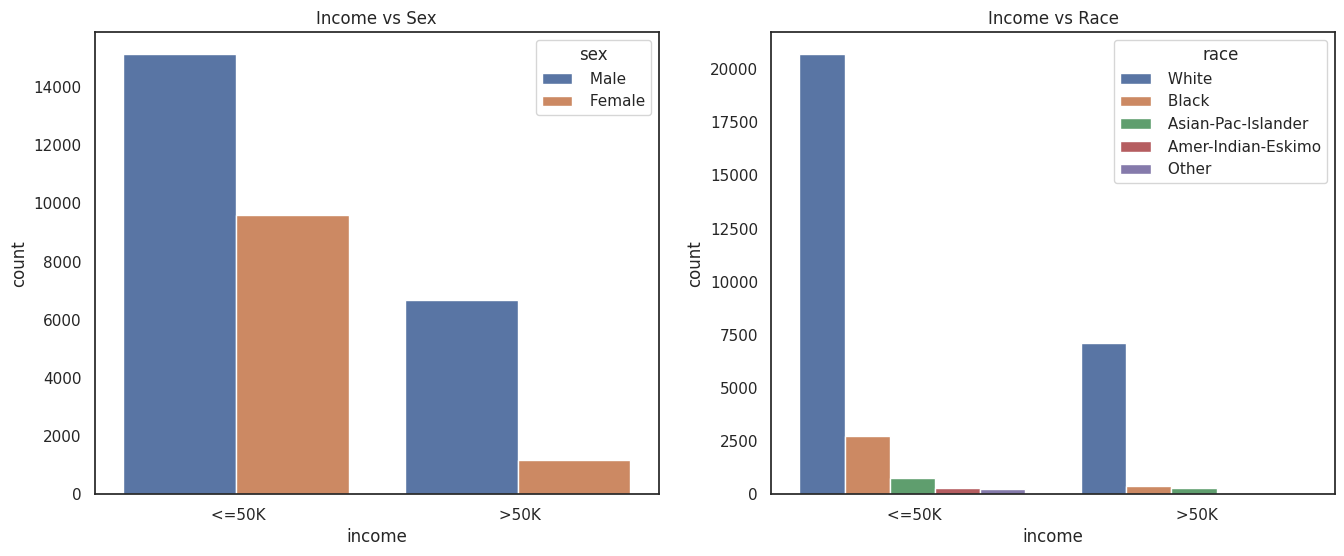

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Income vs Sex')
sns.countplot(x="income", hue="sex", data=df)

plt.subplot(1,2,2)
plt.title('Income vs Race')
sns.countplot(x="income", hue="race", data=df)

plt.show()

> Income Vs Sex
* Men appear to earn a higher median income than women in the United States.
* There appear to be more men than women in the higher income bracket.

> Income Vs Race
* White people appear to have the highest median income among the races depicted in the chart.
* Black people appear to have a lower median income than White people.
* Asian-Pacific Islanders appear to have a lower median income than White people but higher than Black people.
* Native Americans (Amer-Indian-Eskimo) appear to have a lower median income than White people, Black people, and Asian-Pacific Islanders.
* People identified as "Other" appear to have the lowest median income among the races depicted in the chart.

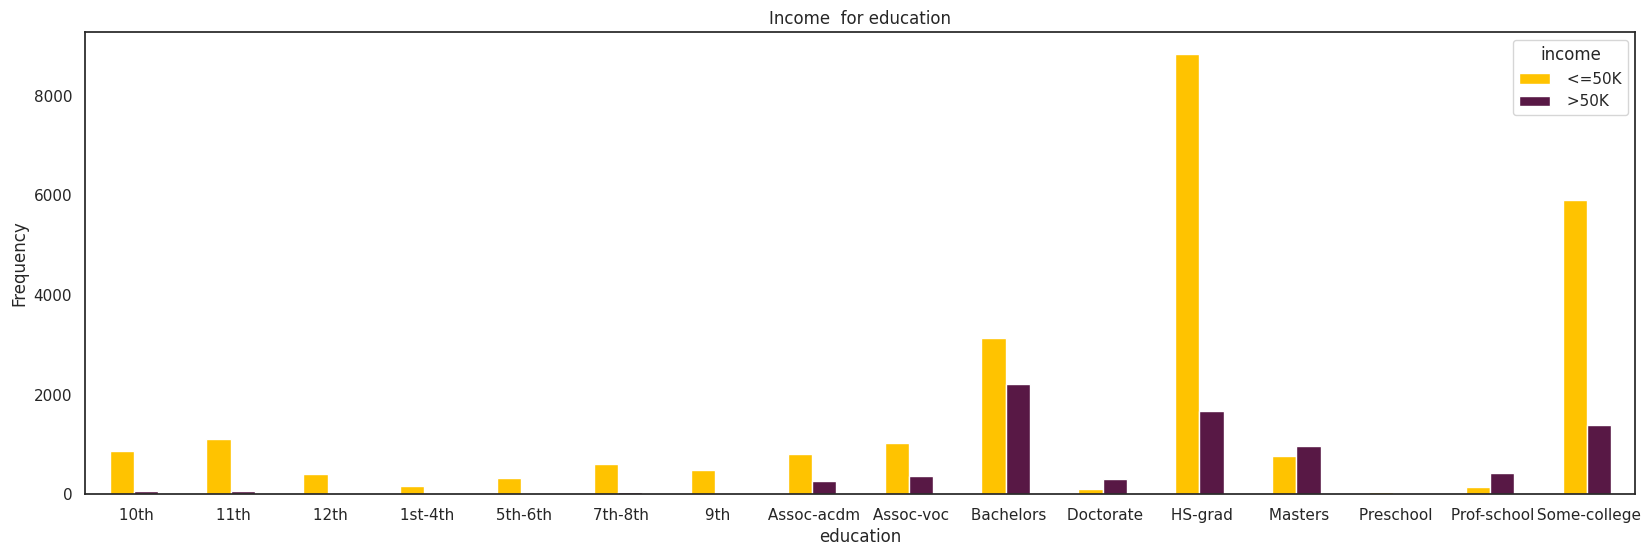

In [ ]:
pd.crosstab(df['education'],df['income']).plot(kind="bar",figsize=(20,6),color=['#FFC300','#581845' ])
plt.title('Income  for education')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

* People with less than a high school diploma (Preschool) appear to have the lowest frequency income.
* The frequency of income gradually increases for those with a high school diploma (HS-grad) and some college experience (Some-college).
* The income frequency appears to be the highest for those with a bachelor's degree (Bachelors).
* The income frequency shows a downward trend for those with an associate's degree (Assoc-acdm) and (Assoc-voc), a master's degree (Masters), and a professional degree (Prof-school).
* The income frequency appears to be moderate for those with a doctorate (Doctorate).



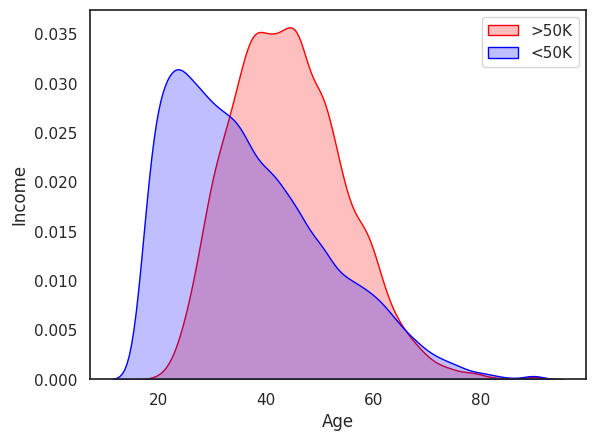

In [ ]:
# Explore Age distibution
g = sns.kdeplot(df["age"][(df["income"] == ' >50K')], color="Red", shade = True)
g = sns.kdeplot(df["age"][(df["income"] == " <=50K")], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Income")
g = g.legend([">50K","<50K"])


We can see that younger people are more likely to earn less than 50K per year. Which is obvious since those people do not have any work experience. The rates of people earning more than 50K start to increase as people age into their 30s.

This is also seen in the purple line(>50K). The line starts to increase from 20 to 45 years old and then slowly decreasing.

# Model Selection - Prediction of income with below models
* Random Forest, Support Vector Machines, Logistic Regression, KNN, Decision Tree, Naive Bayes

In [100]:
#Splitting the data set into features and outcome

X = df.drop(['income'], axis=1)
Y = df['income']

In [101]:
X.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [102]:
# Splitting the data into test data and training data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [103]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [104]:
from sklearn import preprocessing

categorical = ['workclass','education', 'marital_status', 'occupation', 'relationship','race', 'sex','native_country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [105]:
# Using StandardScalar to normalise the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [106]:
X_train.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.470399,-0.082194,-0.174981,0.179166,-0.414963,-0.409687,-1.016724,-0.898445,0.396164,0.701715,0.826332,-0.216969,1.589744,0.258860
1,0.617346,2.631509,-0.763517,0.179166,-0.414963,-1.738219,-1.478640,1.591127,0.396164,-1.425079,0.098582,-0.216969,-0.200583,0.258860
2,0.690820,-0.082194,-0.017034,1.216323,-0.025832,-0.409687,1.061898,-0.898445,0.396164,0.701715,-0.145156,-0.216969,0.775959,0.258860
3,-0.705178,-0.082194,-0.415016,0.179166,-0.414963,0.918845,-1.016724,-0.276052,0.396164,0.701715,-0.145156,-0.216969,-0.037826,-4.026487
4,-1.146019,-0.082194,0.130127,-1.376570,-2.360620,0.918845,-1.016724,-0.276052,0.396164,0.701715,-0.145156,-0.216969,-1.258503,-4.356130


### Training different Models


`model.score` :It takes a feature matrix X_test and the expected target values y_test. Predictions for X_test are compared with y_test and either accuracy (for classifiers)

In [107]:
#Applying the random forest algorithm

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

85.6

In [108]:
#Applying the Logistic Regression algorithm

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
acc_log

82.32

In [109]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn

82.01

In [110]:
#Applying the GaussianNB algorithm
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
acc_gaussian

80.88

In [111]:
#Applying the Support Vector Machine algorithm

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
acc_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)
acc_linear_svc

82.38

In [113]:
#Applying the Decision Tree algorithm

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

81.06

In [120]:
#Plotting the accuracy of the used algorithms to find the best fit

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

,Model
Score,
85.51,Random Forest
82.38,Support Vector Machines
82.32,Logistic Regression
82.01,KNN
81.06,Decision Tree
80.88,Naive Bayes


In [115]:
# Finding significance of each feature in the best fit model

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
fnlwgt,0.168
age,0.148
capital_gain,0.114
relationship,0.100
education_num,0.096
hours_per_week,0.083
marital_status,0.074
occupation,0.069
workclass,0.038


<Axes: xlabel='feature'>

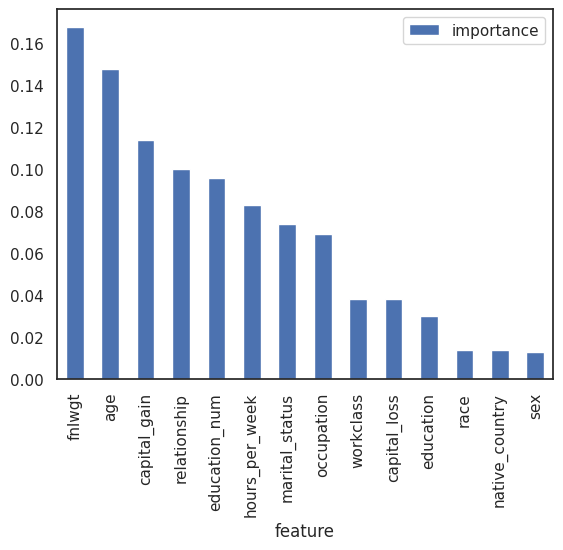

In [116]:
#Plotting the significance of each feautre

importances.plot.bar()

In [ ]:
#Since they hardly have any significance, can drop these columns to avoid overfitting

X  = X.drop("sex", axis=1)
X  = X.drop("race", axis=1)
X  = X.drop("native_country", axis=1)

In [ ]:
# Splitting the data into test data and training data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)



In [118]:
#The accuracy remains the same even after dropping the columns

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_test, Y_test)

acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
print(round(acc_random_forest,2,), "%")

85.51 %


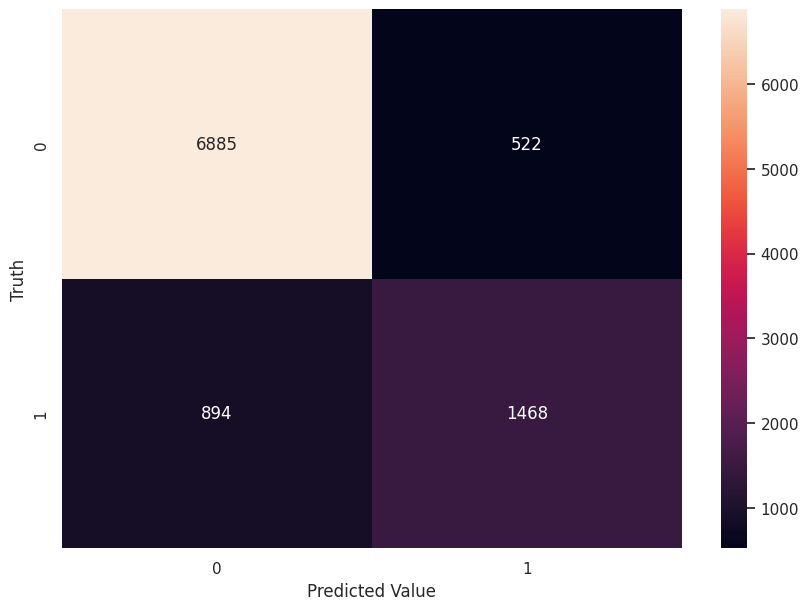

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_prediction) # X_test
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()

# Handling Data Imbalance

If the data is imbalanced, it can cause the overfitting and bias in the odel prediction. So it is important to check and cure the data imbalance if present. We check the target variable to see if it is balanced or not.



In [11]:
new_ds = df.copy(deep=True)

In [12]:
new_ds['income'] = new_ds['income'].str.replace('<=50K', '0')
new_ds['income'] = new_ds['income'].str.replace('>50K', '1')
new_ds['income'] = new_ds['income'].astype(np.int64)

In [13]:
new_ds.income.dtypes


dtype('int64')

We can see that, we have encoded the values of the target variable, and converted it into int data-type. This problem is a classification problem with 'Income' as the target variable. Making a copy of the dataset to work ahead



In [14]:
ds = new_ds.copy()
print(f"Unique values in 'education': {ds.education.nunique()}\nUnique values in 'Education_num': {ds['education_num'].nunique()}")

Unique values in 'education': 16
Unique values in 'Education_num': 16


We see that for the feature 'Education', we already have the encoded values in feature 'Education_num'. 'Education' will be removed from the dataset.



In [15]:
ds.drop(['education'], axis = 1, inplace = True)


'Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country' are the categorical variables in the data. Proper encoding or conversion of these variables is necessary for the feature engineering. We will look at these attributes and convert them one by one.

### 'Workclass': Starting off with the work class, we look the number of unique values and value counts for those values

In [16]:
ds.workclass.value_counts()


workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In work class, majority of the people are private employees. The minority of people are either working without-pay or they have never-worked. We can combine the values of these two values as one.


In [17]:
ds['workclass'] = ds['workclass'].str.replace('Never-worked', 'Without-pay')


Now, we have 8 unique values in this feature.



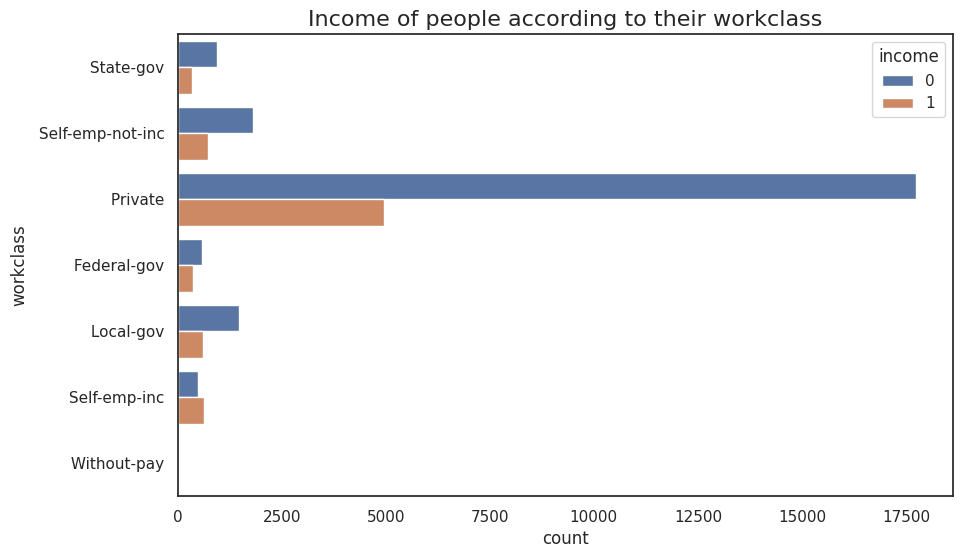

In [18]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their workclass", fontsize = 16)
sns.countplot(y = ds['workclass'], hue = ds['income'])
plt.show()

We see that the majority of people who have income more than 50K a year are from private sector. Same goes for the people with income less than 50K. But for the Self Employed sector, the number of people whose income > 50K are more than the number of people whose income < 50K. Now, moving ahead with replacing the null values and encoding the feature. We will replace the NaN values in the 'Workclass' feature by the mode of the column, grouping it by the 'Occupation' feature. We now have 7 unique values in Workclass feature. We can encode these values using the frequency encoding technique.



In [179]:
new_ds

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [21]:
from sklearn import preprocessing

categorical = ['workclass','education', 'marital_status', 'occupation', 'relationship','race', 'sex','native_country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        new_ds[feature] = le.fit_transform(new_ds[feature])

## Outliers:¶


We check if any outliers are present in the continous attributes of the dataset. We check it both by visualisations and the zscore for the continous columns.



In [22]:
plt.style.use('default')


In [23]:
plt.style.use('ggplot')

BoxPlots of the features:


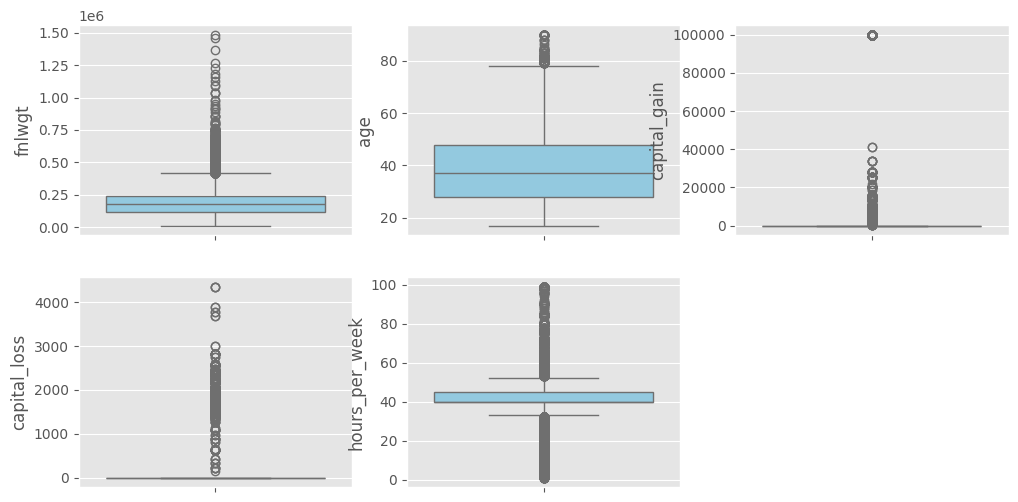

In [24]:
clist = ['fnlwgt','age','capital_gain','capital_loss','hours_per_week']
plt.figure(figsize = (12,6))
for i in range(0, len(clist)):
    plt.subplot(2,3, i+1)
    sns.boxplot(ds[clist[i]], color = 'skyblue')
print("BoxPlots of the features:")
plt.show()

Outliers are present in the continous columns of the feature. We will check the z-score of the features and and clip them from the data.



In [25]:
from scipy.stats import zscore
zabs = np.abs(zscore(new_ds.loc[:,['fnlwgt','hours_per_week']]))
print(np.shape(np.where(zabs >= 3)))
new_ds = new_ds[(zabs < 3).all(axis = 1)]
new_ds

(2, 787)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


WE have a total of 787 outliers in the data. After removing the outliers, we have 31781 observations left.



## Scaling:¶


In [28]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
new_ds.loc[:,'age':'hours_per_week'] = scale.fit_transform(new_ds.loc[:,'age':'hours_per_week'])
new_ds

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,0.750,0.132035,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1,0.021740,0.0,0.493151,38,0
1,0.452055,0.625,0.143765,0.600000,0.800000,0.333333,0.214286,0.0,1.0,1,0.000000,0.0,0.123288,38,0
2,0.287671,0.375,0.411625,0.733333,0.533333,0.000000,0.357143,0.2,1.0,1,0.000000,0.0,0.493151,38,0
3,0.493151,0.375,0.450235,0.066667,0.400000,0.333333,0.357143,0.0,0.5,1,0.000000,0.0,0.493151,38,0
4,0.150685,0.375,0.660111,0.600000,0.800000,0.333333,0.642857,1.0,0.5,0,0.000000,0.0,0.493151,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.375,0.495942,0.466667,0.733333,0.333333,0.857143,1.0,1.0,0,0.000000,0.0,0.465753,38,0
32557,0.315068,0.375,0.287604,0.733333,0.533333,0.333333,0.428571,0.0,1.0,1,0.000000,0.0,0.493151,38,1
32558,0.561644,0.375,0.282617,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0,0.000000,0.0,0.493151,38,0
32559,0.068493,0.375,0.382972,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1,0.000000,0.0,0.219178,38,0


AS we can see from the above table that the data is now more normalised and can be used by the models for learning.
## Data Imbalance:
If the data is imbalanced, it can cause the overfitting and bias in the odel prediction. So it is important to check and cure the data imbalance if present. We check the target variable to see if it is balanced or not.

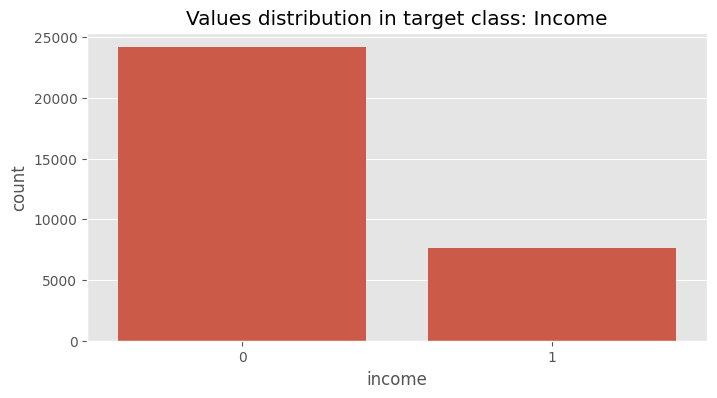

In [29]:
plt.figure(figsize = (8, 4))
plt.title("Values distribution in target class: Income")
sns.countplot(data = new_ds, x = 'income')
plt.show()

As we can see that data is imbalanced. In order **to remove the data imbalance, we use the SMOTETomek class to create synthetic values using KNN algorithm.**


In [31]:
from imblearn.combine import SMOTETomek
x = new_ds.loc[:,"age":"native_country"]
y = new_ds.loc[:,"income"]
smk = SMOTETomek()
x_new, y_new = smk.fit_resample(x, y)

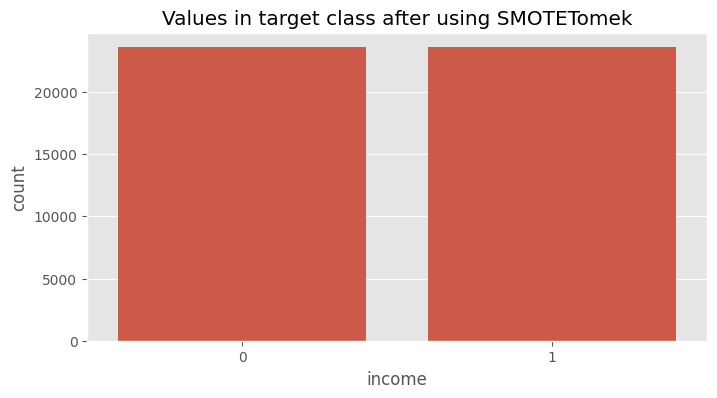

In [32]:
plt.figure(figsize = (8, 4))
plt.title("Values in target class after using SMOTETomek")
sns.countplot(x = y_new)
plt.show()

As we can see that we now have a balanced dataset, so we can model ahead with the model building part.
![](https://kiarofoods.com/wp-content/uploads/2019/10/line_break.png)
## Model Building:
Starting with the spliting of the training and testing data. For that, we check to see what is the best random state.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

max_accuracy = 0
best_rs = 0
for i in range(1, 150):
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy: # after each iteration, acc is replace by the best possible accuracy
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy*100}")

Best Random State is 136, 78.62849063273242


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.30, random_state = 67)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Model Fitting:
Fitting 7 different models to check which model gives the best accuracy.

In [36]:
# For Logistic Regression
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model is", accuracy_score(y_test, pred_lg)*100)

# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model is", accuracy_score(y_test, pred_dtc)*100)

# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model is", accuracy_score(y_test, pred_knc)*100)

# For Support Vector Classifier
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print("Accuracy Score of Support Vector Classifier model is", accuracy_score(y_test, pred_svc)*100)

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model is", accuracy_score(y_test, pred_rfc)*100)

# For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model is", accuracy_score(y_test, pred_nb)*100)

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model is", accuracy_score(y_test, pred_ada)*100)

Accuracy Score of Logistic Regression model is 77.13679745493107
Accuracy Score of Decision Tree Classifier model is 85.89607635206788
Accuracy Score of K-Nearest Neighbour Classifier model is 85.43655001767408
Accuracy Score of Support Vector Classifier model is 72.1951219512195
Accuracy Score of Random Forest model is 90.50547896783316
Accuracy Score of MultinomialNB model is 73.11417462000706
Accuracy Score of ADA Boost model is 86.07988688582539


Best accuracy score is given by Random Forest Classifier model. In order to avoid the bias and overfitting or underfitting, we cross validate the models and check the mean accuracy score of them.
## Cross Validation:
Cross validating the m,odels to see if they are underfitting or overfitting and to prevent bias. We will compare the mean accuracy scores of the model.

In [37]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg, x_new, y_new, cv = 10) # cross validating the model
print(lg_scores) # accuracy scores of each cross validation cycle
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")

dtc_scores = cross_val_score(dtc, x_new, y_new, cv = 10)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

knc_scores = cross_val_score(knc, x_new, y_new, cv = 10)
print(knc_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knc_scores.mean()*100}\n")

svc_scores = cross_val_score(svc, x_new, y_new, cv = 10)
print(svc_scores)
print(f"Mean of accuracy scores is for SVC Classifier is {svc_scores.mean()*100}\n")

rfc_scores = cross_val_score(rfc, x_new, y_new, cv = 10)
print(rfc_scores)
print(f"Mean of accuracy scores is for Random Forest Classifier is {rfc_scores.mean()*100}\n")

nb_scores = cross_val_score(nb, x_new, y_new, cv = 10)
print(nb_scores)
print(f"Mean of accuracy scores is for MultinomialNB is {nb_scores.mean()*100}\n")

ada_scores = cross_val_score(ada, x_new, y_new, cv = 10)
print(ada_scores)
print(f"Mean of accuracy scores is for ADA Boost Classifier is {ada_scores.mean()*100}\n")

[0.76861082 0.77518558 0.78621421 0.76882291 0.76564157 0.76861082
 0.78812301 0.7804878  0.77900318 0.77179215]
Mean of accuracy scores is for Logistic Regression is 77.52492046659599

[0.79893955 0.80742312 0.80169671 0.88441145 0.89798515 0.8911983
 0.9028632  0.90943796 0.89946978 0.89692471]
Mean of accuracy scores is for Decision Tree Classifier is 86.90349946977729

[0.85577943 0.84772004 0.85068929 0.85874867 0.86702015 0.87423118
 0.87741251 0.88313892 0.8776246  0.87486744]
Mean of accuracy scores is for KNN Classifier is 86.67232237539766

[0.73191941 0.7397667  0.73891835 0.73276776 0.7340403  0.73488865
 0.73361612 0.73934252 0.72895016 0.73552492]
Mean of accuracy scores is for SVC Classifier is 73.49734888653234

[0.84793213 0.85387063 0.85811241 0.92746554 0.93361612 0.93679745
 0.9416755  0.94082715 0.93679745 0.93446448]
Mean of accuracy scores is for Random Forest Classifier is 91.11558854718982

[0.73828208 0.74400848 0.74209968 0.73743372 0.73616119 0.73616119
 0.7

In [38]:
# Checking for difference between accuracy and mean accuracies.
lis3 = ['Logistic Regression','Decision Tree Classifier','KNeighbors Classifier','SVC', 'Random Forest Classifier',
        'MultinomialNB', 'ADA Boost Classifier']

lis1 = [accuracy_score(y_test, pred_lg)*100, accuracy_score(y_test, pred_dtc)*100, accuracy_score(y_test, pred_knc)*100,
        accuracy_score(y_test, pred_svc)*100, accuracy_score(y_test, pred_rfc)*100, accuracy_score(y_test, pred_nb)*100,
        accuracy_score(y_test, pred_ada)*100]

lis2 = [lg_scores.mean()*100, dtc_scores.mean()*100, knc_scores.mean()*100, svc_scores.mean()*100, rfc_scores.mean()*100,
        nb_scores.mean()*100, ada_scores.mean()*100]

for i in range(0, 7):
    dif = (lis1[i]) - (lis2[i])
    print(lis3[i], dif)

Logistic Regression -0.38812301166491636
Decision Tree Classifier -1.0074231177094077
KNeighbors Classifier -1.235772357723576
SVC -1.3022269353128308
Random Forest Classifier -0.61010957935666
MultinomialNB -0.7437256981265392
ADA Boost Classifier 0.15835984446802343


**Random forest classifier is the best model with highest cross validation mean score and accuracy score**. We will use it for the model building.
## Hyperparameter Tuning:
Tuning the parameters of the Random Forest in order to obtain the best possible parameters for model building.

In [39]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param = dict()
param['criterion'] = ['gini', 'entropy']
param['n_estimators'] = [1, 2, 4, 8, 10, 16, 32, 64, 100, 200]
param['min_samples_split'] = [1,2,5,8,10,15,20,25,50,55,60,80,100]


gs = GridSearchCV(estimator = rfc, param_grid = param, scoring='f1', cv = 5, n_jobs = 3)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9035098903114497
{'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 200}


After the hyperparameter tuning, **the best parameters for Random Forest Classifier are 'crietrion' = 'entropy', 'min_samples_split' = 2, 'n_estimators' = 100**. We build the model using these parameters.

In [40]:
rfc = RandomForestClassifier(criterion = 'entropy', min_samples_split = 2, n_estimators = 100)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
pred_rfc = rfc.predict(x_test)

0.9999697015603697


Model Evaluation:
We have build the model after the cross validation and hyper parameter tuning. It is now time to evaluate the model using the classification report, confusion matrix and ROC curve.

In [44]:
!pip install scikit-plot


In [47]:
from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix, classification_report
from scikitplot.metrics import plot_roc_curve


print("Accuracy Score of RFC model is", accuracy_score(y_test, pred_rfc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_rfc))
print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_rfc))

Accuracy Score of RFC model is 90.54789678331566
Confusion matrix for RFC Model is
[[6331  753]
 [ 584 6477]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      7084
           1       0.90      0.92      0.91      7061

    accuracy                           0.91     14145
   macro avg       0.91      0.91      0.91     14145
weighted avg       0.91      0.91      0.91     14145



After the model evaluation , we get the precision and recall for both the target variable as 0.92 and 0.91. The f1- score of the model is 0.91.